In [1]:
import pandas as pd
import plotly.express as px

In [2]:
years = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
root = "C:/Users/uvm88/Desktop/Entregables/DATOS LIMPIOS 2013-2023/DEFUNCIONES/DIABETES/DEFUNDIABETES"
df_defunciones_diabetes = []

for year in years:
    df_base_diabetes = pd.read_csv(root + year + ".csv")
    df_base_diabetes.insert(0, "año", year)
    df_defunciones_diabetes.append(df_base_diabetes)
df_concat = pd.concat(df_defunciones_diabetes)
df_concat = df_concat.reset_index().drop("index", axis = 1)
df_concat

año  sexo  edad_agrupada  edad causa_defuncion  capitulo  grupo  \
0        2013     2             15  54.0            E119         4      2   
1        2013     1             19  74.0            E119         4      2   
2        2013     2             20  76.0            E112         4      2   
3        2013     2             19  74.0            E117         4      2   
4        2013     1             20  79.0            E112         4      2   
...       ...   ...            ...   ...             ...       ...    ...   
1216226  2023     2             17  63.0            E117         4      2   
1216227  2023     1             19  73.0            E112         4      2   
1216228  2023     1             20  79.0            E146         4      2   
1216229  2023     1             23  94.0            E119         4      2   
1216230  2023     2             21  82.0            E116         4      2   

         entidad_ocurrencia  municipio_ocurencia  area_ur  entidad_residencia  \
0                         1                  3.0        1                   1   
1                         1                  1.0        1                   1   
2                         1                  1.0        2                   1   
3                         1                  1.0        1                  32   
4                         1                  1.0        1                   1   
...                     ...                  ...      ...                 ...   
1216226                  32                 56.0        2                  32   
1216227                  32                 47.0        1                  32   
1216228                  32                 25.0        2                  32   
1216229                  32                 25.0        1                  32   
1216230                  32                 22.0        1                  32   

         municipio_residencia  escolaridad  derechohabientes  edad_anios  \
0                           3            1                99        54.0   
1                           1            3                 2        74.0   
2                           1            3                 2        76.0   
3                          34            3                 2        74.0   
4                           1            1                 2        79.0   
...                       ...          ...               ...         ...   
1216226                    50            3                 2        63.0   
1216227                    47            4                99        73.0   
1216228                    25            3                 2        79.0   
1216229                    25            1                 1        94.0   
1216230                    22            1                 1        82.0   

         asistencia_medica  municipio_ocurrencia  
0                      NaN                   NaN  
1                      NaN                   NaN  
2                      NaN                   NaN  
3                      NaN                   NaN  
4                      NaN                   NaN  
...                    ...                   ...  
1216226                1.0                   NaN  
1216227                1.0                   NaN  
1216228                1.0                   NaN  
1216229                2.0                   NaN  
1216230                2.0                   NaN  

[1216231 rows x 17 columns]

In [7]:
df_lineplot = df_concat["año"].value_counts().reset_index()
df_lineplot.columns = ["año", "cantidad"]
df_lineplot = df_lineplot.sort_values("año", ignore_index = True)

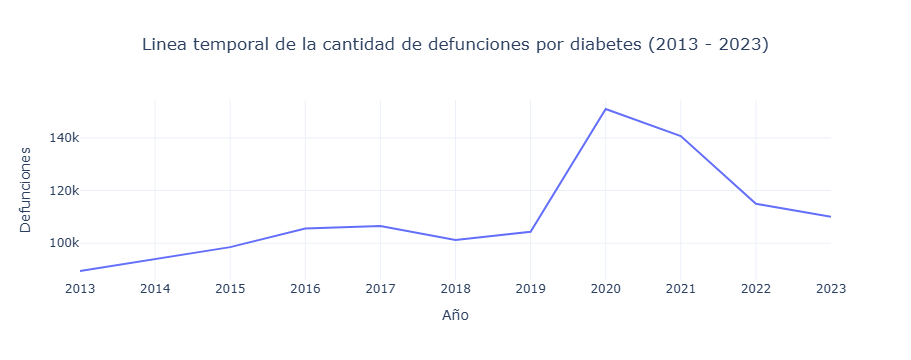

In [18]:
fig_line = px.line(
              df_lineplot,
              x='año',
              y='cantidad',
              title='Linea temporal de la cantidad de defunciones por diabetes (2013 - 2023)',
              template='plotly_white')


fig_line.update_layout(
    xaxis_title='Año',
    yaxis_title='Defunciones',
    title_x=0.5 
)
fig_line.write_html("linea_temporal_defunciones_diabetes.html")
fig_line.show()

In [15]:
df_concat.value_counts("causa_defuncion")
df_concat = df_concat[df_concat["causa_defuncion"].isin(["E112", "E116", "E119", "E117", "E149"])]
df_agrupado = df_concat["causa_defuncion"].value_counts().reset_index()
df_agrupado.columns = ["Enfermedad", "Cantidad"]

mapeo = {
    "E112":"DM2 con com. renales",
    "E116":"DM2 con com. N/E",
    "E119":"DM2",
    "E117":"DM2 con com. múltiples",
    "E149":"DM no esp."
}
df_agrupado["Enfermedad"] = df_agrupado["Enfermedad"].replace(mapeo)
df_agrupado

Enfermedad  Cantidad
0    DM2 con com. renales    244093
1        DM2 con com. N/E    203017
2                     DM2    185806
3  DM2 con com. múltiples    154534
4              DM no esp.     90924

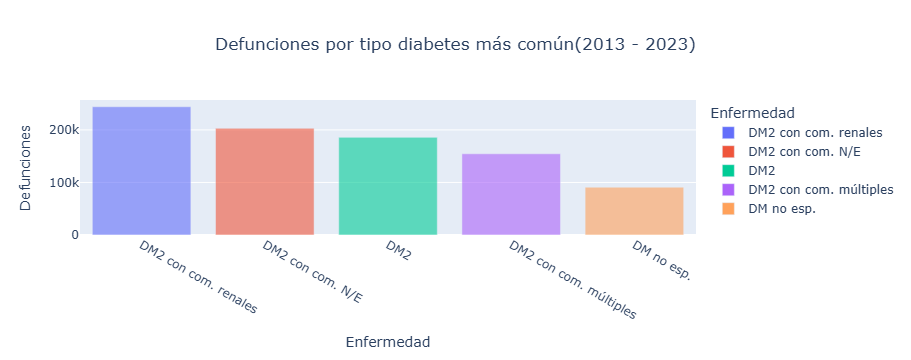

In [21]:
fig_bar = px.bar(
    df_agrupado,
    x = "Enfermedad",
    y = "Cantidad",
    color = "Enfermedad",
    title = "Defunciones por tipo diabetes más común(2013 - 2023)",
    opacity=0.6
)

fig_bar.update_layout(
    xaxis_title = "Enfermedad",
    yaxis_title = "Defunciones",
    title_x = 0.5
)

fig_bar.show()
fig_bar.write_html("defunciones_diabetes_mas_comunes.html")

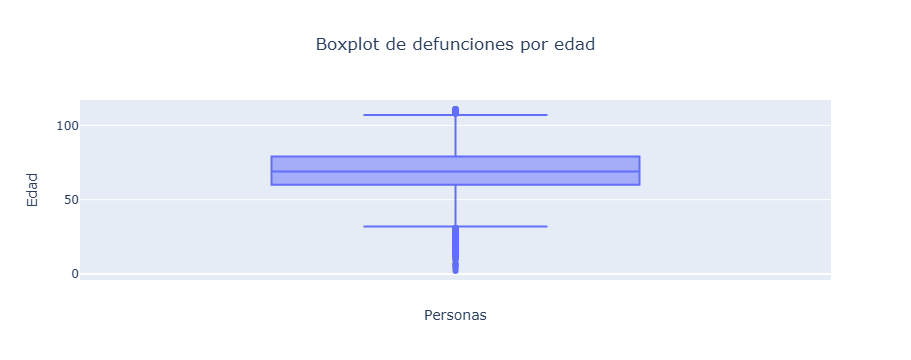

In [23]:
df_concat = df_concat[(df_concat["edad"] < 112) & (df_concat["edad"] > 1)]

plotbox_m = px.box(
    df_concat,
    y = "edad",
    title = "Boxplot de defunciones por edad",
)

plotbox_m.update_layout(
    xaxis_title = "Personas",
    yaxis_title = "Edad",
    title_x = 0.5
)

plotbox_m.show()
plotbox_m.write_html("boxplot_defunciones_por_edad_diabetes.html")

In [24]:
df_agrupado = df_concat.groupby("sexo").size().reset_index(name="Cantidad")
mapeo = {
    1:"Hombres",
    2:"Mujeres",
}
df_agrupado["sexo"] = df_agrupado["sexo"].replace(mapeo)
df_agrupado = df_agrupado.drop(2, axis = 0)
df_agrupado

sexo  Cantidad
0  Hombres    435264
1  Mujeres    443075

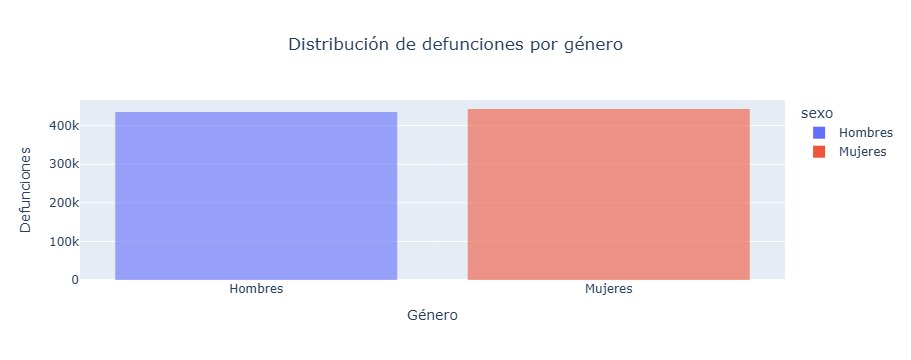

In [25]:
fig_defun = px.histogram(
    df_agrupado,
    x = "sexo",
    y = "Cantidad",
    color = "sexo",
    nbins = 2,
    barmode = "overlay",
    opacity = 0.6,
    title = "Distribución de defunciones por género"
)

fig_defun.update_layout(
    xaxis_title="Género",
    yaxis_title="Defunciones",
    title_x=0.5
)

fig_defun.show()
fig_defun.write_html("distribucion_defunciones_diabetes_genero.html")

In [3]:
df_agrupado = df_concat.groupby("derechohabientes").size().reset_index(name="Personas")

mapeo = {
    1:"Ninguna",
    2:"IMSS",
    3:"ISSSTE",
    4:"PEMEX",
    5:"SEDENA",
    6:"SEMAR",
    7:"Seguro Popular",
    8:"Otra",
    9:"IMSS PROSPERA",
    10:"ISSFAM",
    99:"N/E"
}
df_agrupado["derechohabientes"] = df_agrupado["derechohabientes"].replace(mapeo)

df_agrupado

derechohabientes  Personas
0           Ninguna    278362
1              IMSS    444333
2            ISSSTE     99027
3             PEMEX     10000
4            SEDENA      8339
5             SEMAR      2198
6    Seguro Popular    215464
7              Otra     25814
8     IMSS PROSPERA      6333
9            ISSFAM       641
10              N/E    125720

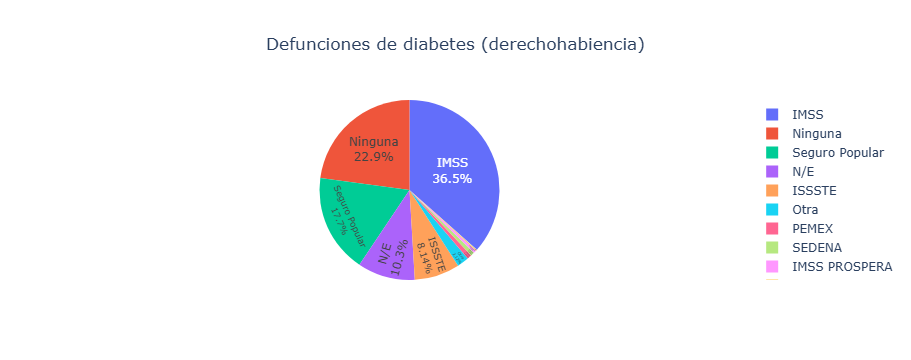

In [4]:
piechart = px.pie(
    df_agrupado,
    names = "derechohabientes",
    values = "Personas",
    title = "Defunciones de diabetes (derechohabiencia)"
)

piechart.update_traces(textposition='inside', textinfo='percent+label')
piechart.update_layout(title_x=0.5)

piechart.show()
piechart.write_html("defunciones_diabetes_derechohabiencia.html")

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [37]:
df_concat["geometry"] = None
df_concat
gdf = gpd.GeoDataFrame(df_concat, geometry="geometry")
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_file("archivo_diabetes.geojson", driver="GeoJSON")

In [46]:
gdf_def_diabetes = gpd.read_file(r"C:\Users\uvm88\Desktop\Entregables\Códigos\defunciones_cancer_diabetes\Códigos\archivo_diabetes.geojson")
gdf_def_diabetes.head(3)

año  sexo  edad_agrupada  edad causa_defuncion  capitulo  grupo  \
0  2013     2             15  54.0            E119         4      2   
1  2013     1             19  74.0            E119         4      2   
2  2013     2             20  76.0            E112         4      2   

   entidad_ocurrencia  municipio_ocurencia  area_ur  entidad_residencia  \
0                   1                  3.0        1                   1   
1                   1                  1.0        1                   1   
2                   1                  1.0        2                   1   

   municipio_residencia  escolaridad  derechohabientes  edad_anios  \
0                     3            1                99        54.0   
1                     1            3                 2        74.0   
2                     1            3                 2        76.0   

   asistencia_medica  municipio_ocurrencia geometry  
0                NaN                   NaN     None  
1                NaN                   NaN     None  
2                NaN                   NaN     None

In [48]:
gdf_def_diabetes_agg = gdf_def_diabetes.groupby(by = "entidad_ocurrencia")["causa_defuncion"].agg(["count"])
gdf_def_diabetes_agg = gdf_def_diabetes_agg.reset_index()

In [49]:
mun = gpd.read_file(r"C:\Users\uvm88\Desktop\Entregables\mg_2024_integrado\conjunto_de_datos\00ent.shp")
mun["CVE_ENT"] = mun["CVE_ENT"].astype(int)
mun.head(3)

CVEGEO  CVE_ENT               NOMGEO  \
0     01        1       Aguascalientes   
1     02        2      Baja California   
2     03        3  Baja California Sur   

                                            geometry  
0  POLYGON ((2469550.852 1159302.643, 2469738.209...  
1  MULTIPOLYGON (((1313480.513 1831458.607, 13135...  
2  MULTIPOLYGON (((1694656.345 1227647.637, 16946...

<Axes: >

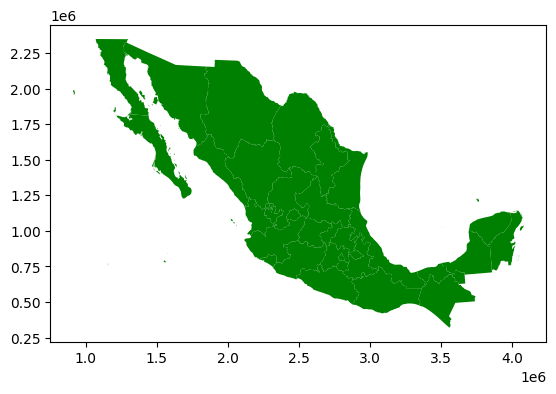

In [50]:
mun.plot(color = "green")

In [52]:
datos_me = mun.merge(gdf_def_diabetes_agg, left_on = "CVE_ENT", right_on = "entidad_ocurrencia") 
datos_me

CVEGEO  CVE_ENT                           NOMGEO  \
0      01        1                   Aguascalientes   
1      02        2                  Baja California   
2      03        3              Baja California Sur   
3      04        4                         Campeche   
4      05        5             Coahuila de Zaragoza   
5      06        6                           Colima   
6      07        7                          Chiapas   
7      08        8                        Chihuahua   
8      09        9                 Ciudad de México   
9      10       10                          Durango   
10     11       11                       Guanajuato   
11     12       12                         Guerrero   
12     13       13                          Hidalgo   
13     14       14                          Jalisco   
14     15       15                           México   
15     16       16              Michoacán de Ocampo   
16     17       17                          Morelos   
17     18       18                          Nayarit   
18     19       19                       Nuevo León   
19     20       20                           Oaxaca   
20     21       21                           Puebla   
21     22       22                        Querétaro   
22     23       23                     Quintana Roo   
23     24       24                  San Luis Potosí   
24     25       25                          Sinaloa   
25     26       26                           Sonora   
26     27       27                          Tabasco   
27     28       28                       Tamaulipas   
28     29       29                         Tlaxcala   
29     30       30  Veracruz de Ignacio de la Llave   
30     31       31                          Yucatán   
31     32       32                        Zacatecas   

                                             geometry  entidad_ocurrencia  \
0   POLYGON ((2469550.852 1159302.643, 2469738.209...                   1   
1   MULTIPOLYGON (((1313480.513 1831458.607, 13135...                   2   
2   MULTIPOLYGON (((1694656.345 1227647.637, 16946...                   3   
3   MULTIPOLYGON (((3544897.199 946994.621, 354491...                   4   
4   POLYGON ((2469501.165 1978862.429, 2469539.651...                   5   
5   MULTIPOLYGON (((1157633.318 768573.525, 115772...                   6   
6   POLYGON ((3558179.782 698365.65, 3558487.689 6...                   7   
7   POLYGON ((1961978.327 2201082.365, 1961978.967...                   8   
8   POLYGON ((2802175.66 843326.718, 2801806.564 8...                   9   
9   POLYGON ((2107050.444 1641943.398, 2109767.527...                  10   
10  POLYGON ((2565680.117 1091540.718, 2565824.734...                  11   
11  MULTIPOLYGON (((2723457.629 539108.73, 2723550...                  12   
12  POLYGON ((2862652.145 1047275.093, 2862699.022...                  13   
13  MULTIPOLYGON (((2204875.697 806482.707, 220488...                  14   
14  POLYGON ((2717218.9 921748.845, 2717277.834 92...                  15   
15  POLYGON ((2498447.541 932170.571, 2498502.695 ...                  16   
16  POLYGON ((2803716.03 789403.364, 2808717.306 7...                  17   
17  MULTIPOLYGON (((2161261.691 1008297.886, 21612...                  18   
18  POLYGON ((2678077.258 1749532.053, 2678536.29 ...                  19   
19  MULTIPOLYGON (((3120848.31 424036.022, 3120862...                  20   
20  POLYGON ((2930796.705 987525.496, 2930806.28 9...                  21   
21  POLYGON ((2789578.589 1075590.981, 2790053.712...                  22   
22  MULTIPOLYGON (((4039086.131 787620.709, 403895...                  23   
23  POLYGON ((2632580.368 1381778.507, 2636954.232...                  24   
24  MULTIPOLYGON (((2050677.49 1245244.569, 205066...                  25   
25  MULTIPOLYGON (((1653626.132 1730623.054, 16535...                  26   
26  POLYGON ((3503138.751 772685.828, 3503290.393 ...                  27   
27  POLYGON ((2723631.021 17367

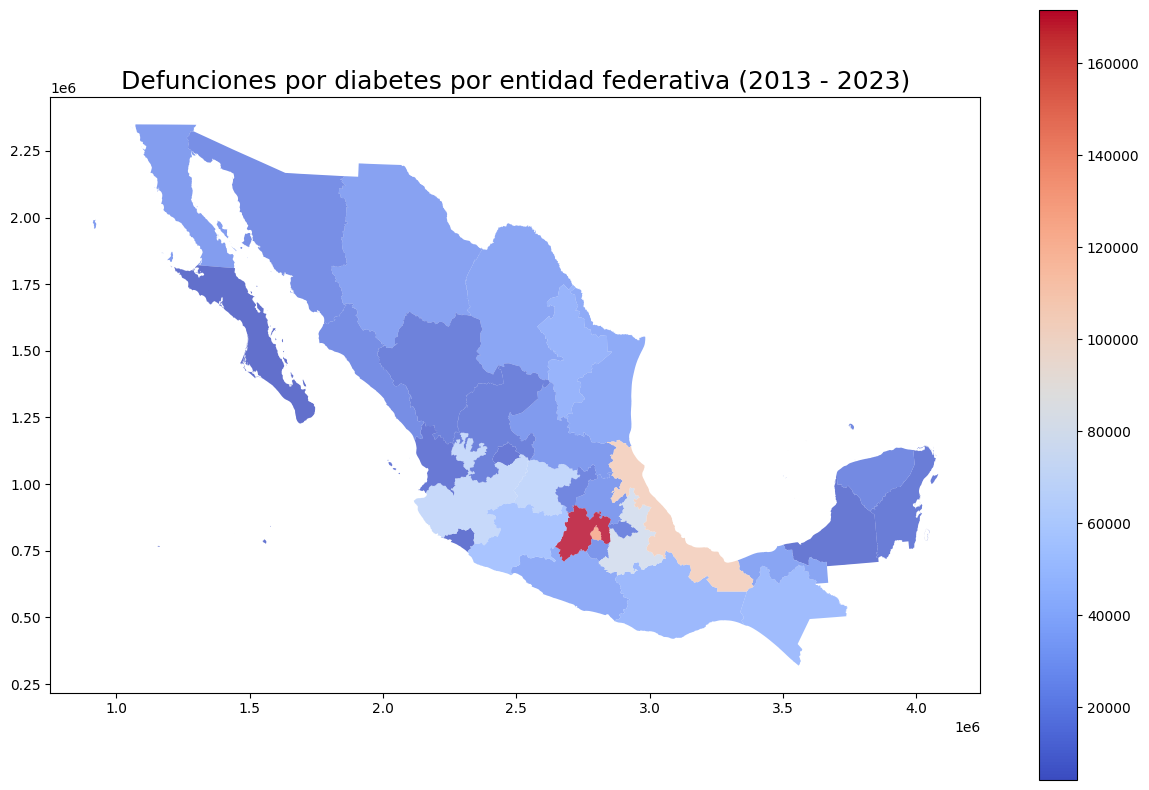

In [54]:
datos_me.plot(legend = True, 
                                 column = "count", 
                                 cmap = "coolwarm", 
                                 alpha = 0.8, 
                                 figsize = (15,10),
                                 )
plt.title("Defunciones por diabetes por entidad federativa (2013 - 2023)", fontsize=18)
plt.savefig("defun_diabetes_mapa", dpi=300)
plt.show()